# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import pandas as pd

path = 'water_potability.csv'

df = pd.read_csv(path)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'water_potability.csv'

Plot the Data Appropriately

In [ ]:

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)


In [ ]:
#Splitting the dataset into target and features
target = "Potability"
X = df.drop(target, axis=1)
Y = df[target]

In [ ]:
X.shape

(3276, 9)

In [ ]:
#Filling missing values with the mean
X.fillna(X.mean(), inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [ ]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:

#from sklearn import train_test_split
from sklearn.model_selection import train_test_split
#trainX, testX = X[:n_train, :], X[n_train:, :]

trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
# split into train and test

# n_train =  len(X_scaled/80)*100
# trainX, testX = X_scaled[n_train:, :], X_scaled[:n_train, :]
# trainY, testY = Y[n_train:], Y[:n_train]

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)




(2620, 9)
(656, 9)
(2620,)
(656,)


# Define the model

In [ ]:
trainX.shape[1]

9

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Start the training Process

1. **Using adam optimizer on early stopping**

Train: 0.713, Test: 0.686


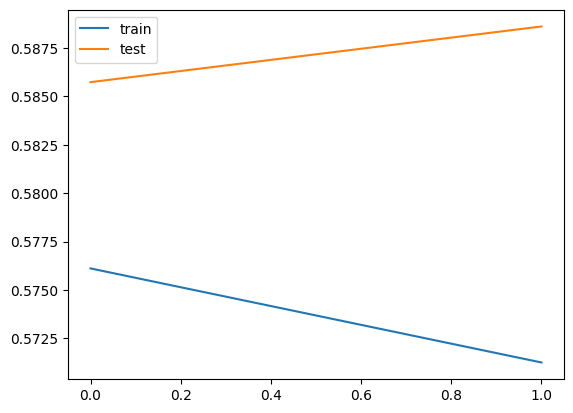

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

es = EarlyStopping()

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**2. Comparing how it performs without using early stopping**

Streaming output truncated to the last 5000 lines.
82/82 [==============================] - 0s 3ms/step - loss: 5.6908e-04 - accuracy: 1.0000 - val_loss: 5.1734 - val_accuracy: 0.6037
Epoch 1502/4000
82/82 [==============================] - 0s 4ms/step - loss: 5.6916e-04 - accuracy: 1.0000 - val_loss: 5.1737 - val_accuracy: 0.6037
Epoch 1503/4000
82/82 [==============================] - 0s 4ms/step - loss: 5.6908e-04 - accuracy: 1.0000 - val_loss: 5.1734 - val_accuracy: 0.6037
Epoch 1504/4000
82/82 [==============================] - 0s 4ms/step - loss: 5.6881e-04 - accuracy: 1.0000 - val_loss: 5.1738 - val_accuracy: 0.6037
Epoch 1505/4000
82/82 [==============================] - 0s 3ms/step - loss: 5.6879e-04 - accuracy: 1.0000 - val_loss: 5.1743 - val_accuracy: 0.6037
Epoch 1506/4000
82/82 [==============================] - 0s 3ms/step - loss: 5.6843e-04 - accuracy: 1.0000 - val_loss: 5.1752 - val_accuracy: 0.6037
Epoch 1507/4000
82/82 [==============================] - 0s 4ms/step - 

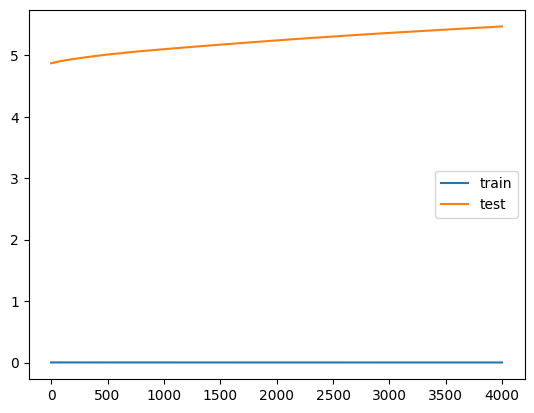

In [ ]:

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=1)#callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**3. Using adam optimizer on L1**

Train: 0.702, Test: 0.689


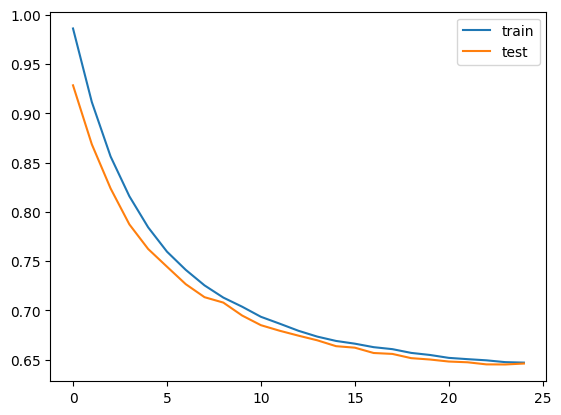

In [ ]:
from keras.regularizers import l1


model_l1 = Sequential()
model_l1.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.001)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))

#Compile the model
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l1.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l1.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l1.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**4. Using adam optimizer on L2**

Train: 0.709, Test: 0.671


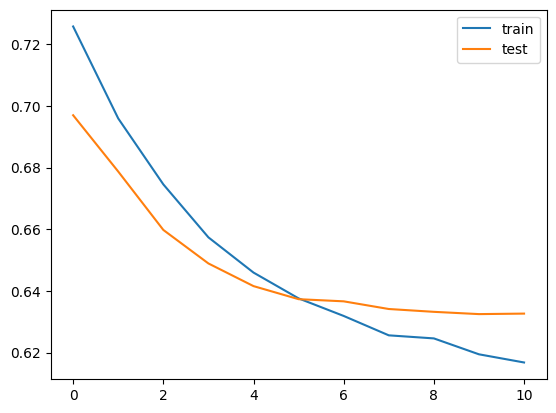

In [ ]:
from keras.regularizers import l2


model_l2 = Sequential()
model_l2.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.001)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l2.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l2.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Compare the output without Early stopping

**5. Using SGD optimizer on L1**

Train: 1.000, Test: 0.610


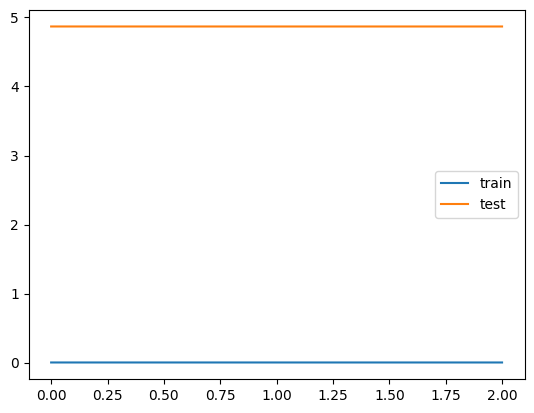

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

es = EarlyStopping()

#Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
loss, accu = model.evaluate(X, Y)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accu:.3f}')

103/103 [==============================] - 0s 1ms/step - loss: 3102.3730 - accuracy: 0.5607
Test loss: 3102.373
Test accuracy: 0.561
